In [7]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
import math as math
%matplotlib inline

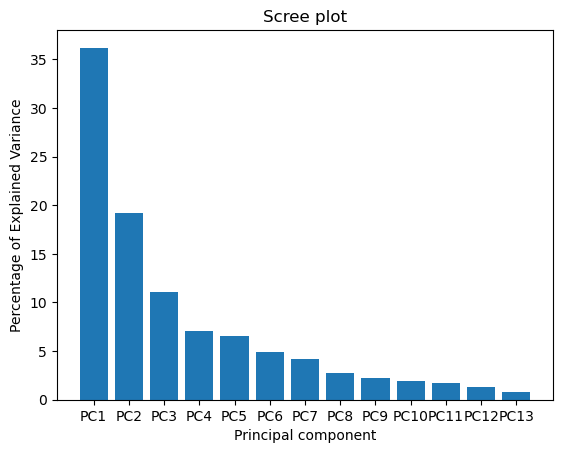

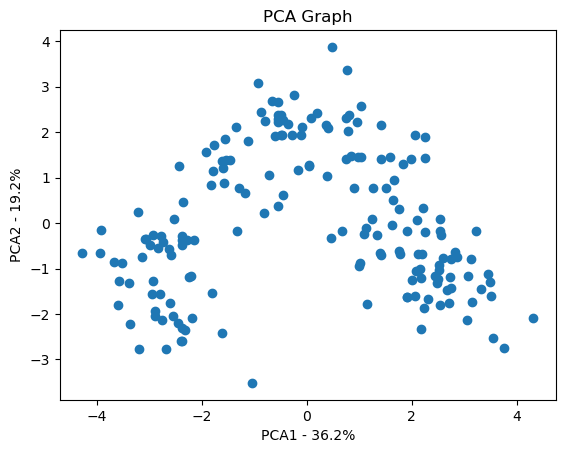

<class 'list'>


In [8]:
#Import, scale, perform PCA and plot data
colnames = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

data = pd.read_csv('WINE.txt', names=colnames, usecols=['2','3','4','5','6','7','8','9','10','11','12','13','14'], delimiter=r"\s+")

data.head()

scaled_data = preprocessing.scale(data)

#------------------------------------------------------------------------------------------------- Creates PCA object and performs the pca calculations ----------------------------------------------------------------------------------------
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ *100, decimals = 1)

labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]


#-------------------------------------------------------------------------------------------------Set up the different values needed for plotting the graph and plot the SCREE graph -----------------------------------------------------------------
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

#-------------------------------------------------------------------------------------------------Set up the different values needed for plotting the graph and plot the PCA graph -----------------------------------------------------------------
pca_data = pd.DataFrame(pca_data, index = range(1,len(data)+1), columns = labels)
plt.scatter(pca_data.PC1, pca_data.PC2)
plt.title('PCA Graph')
plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
plt.ylabel('PCA2 - {0}%'.format(per_var[1]))
plt.show()
print(list)

In [21]:
#--------------------------K-means clustering from here--------------------------

#Help functions 


def random_centers(dim, k, len_data):
    centers = []

    for i in range(k):
        center_coordinates = []
        for j in range(dim):
            rand_num = random.uniform(-4,4)
            center_coordinates.append(rand_num) 
        centers.append(center_coordinates)

    return centers

#returns the centroid with the least euclidean distance to data_point
def smallest_centroid_distance(data_point, centers, dims):

    smallest_euc_dist = math.inf
    vector_diff = 0
    print(data_point.iloc[0:1,0:dims+1])

    for index in range(0, len(centers)):
        
        sum_square = 0
        vector_diff = pca_data.astype(float).iloc[0:1,0:dims] - centers[index]
        print("Vector diff: " + str(vector_diff))
        for i in range(0, dims):
            sum_square += vector_diff.iloc[0,i]**2 
        print("Sum square " + str(sum_square))
        euclidean_distance = np.sqrt(sum_square)
        print("Euclidean distance " + str(euclidean_distance))
        if euclidean_distance<smallest_euc_dist:
            smallest_index = index
            smallest_euc_dist = euclidean_distance 
        print()
            
    return smallest_euc_dist, smallest_index


# ! Append each point of the dataset to a list. Later on we will update the centroids using the mean of each index from each list 
def point_clustering(data, centers, index, dims):   
    for point in range(0,len(data)):
        zero_list = []
        one_list = []
        two_list = []

        
        #print(data.iloc[point, 0:dims])git 

        if index == 0:
            zero_list.append(data[point])
        elif index == 1:
            one_list.append(data[point])
        elif index ==2:
            two_list.append(data[point])

        
    print('Zero List: ' + str(zero_list))
    print('One List: ' + str(one_list))
    print('Two List: ' + str(two_list))
    return data

def mean_center(data, center, dims):
    return new_centers




In [22]:
num_dims = 3
num_centroids = 3
centroids = random_centers(num_dims, num_centroids, len(pca_data))

#print(centroids)

distance, smallest_index= smallest_centroid_distance(pca_data.astype(float).iloc[0:1,0:num_dims], centroids, num_dims)
print('Does it pass through')
print(distance)
#print(smallest_index)

#print(pca_data)

point_clustering(pca_data.astype(float).iloc[:,:].values, num_centroids, smallest_index, num_dims)


        PC1       PC2       PC3
1  3.316751 -1.443463 -0.165739
Vector diff:        PC1      PC2       PC3
1  2.43932 -1.64254  3.373865
Sum square 20.031185904366936
Euclidean distance 4.475621286968653

Vector diff:         PC1       PC2      PC3
1  6.061547 -1.384251 -3.14907
Sum square 48.57514506932667
Euclidean distance 6.96958715200023

Vector diff:         PC1       PC2       PC3
1  4.592634 -4.814983 -2.373721
Sum square 49.9109027981717
Euclidean distance 7.064764879185414

Does it pass through
4.475621286968653
Zero List: [array([-3.20875816, -2.76891957,  1.01391366,  0.59690319, -0.89519259,
        0.29609218,  0.00574126, -0.29291373,  0.74166042, -0.11796902,
       -0.22996433, -0.18878796, -0.32396472])]
One List: []
Two List: []


array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])